<img src ="excelrlogo.png"/>

### Assignment-05 - Multiple Linear Regression

#### PROBLEM STATEMENTS - Toyota Corolla

In [1]:
import pandas as pd
import numpy as np

In [2]:
ToyotaCorolla = pd.read_csv("ToyotaCorolla.csv", encoding='latin1')
ToyotaCorolla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
ToyotaCorolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
ToyotaCorolla.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Exploratory Data Analysis

In [5]:
ToyotaCorolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
ToyotaCorolla_New = pd.concat([ToyotaCorolla.iloc[:,2:4], ToyotaCorolla.iloc[:,6:7], ToyotaCorolla.iloc[:,8:9], ToyotaCorolla.iloc[:,12:14],ToyotaCorolla.iloc[:,15:18]],axis=1)
ToyotaCorolla_New

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
ToyotaCorolla_Old = ToyotaCorolla_New.rename({'Age_05_05':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
ToyotaCorolla_Old

,Price,Age_08_04,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
ToyotaCorolla_Old[ToyotaCorolla_Old.duplicated()]

,Price,Age_08_04,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
ToyotaCorolla_1 = ToyotaCorolla_Old.drop_duplicates().reset_index(drop=True)
ToyotaCorolla_1

,Price,Age_08_04,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [10]:
ToyotaCorolla_1.describe()

,Price,Age_08_04,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


#### CORRELATION

In [11]:
ToyotaCorolla_1.corr()

,Price,Age_08_04,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


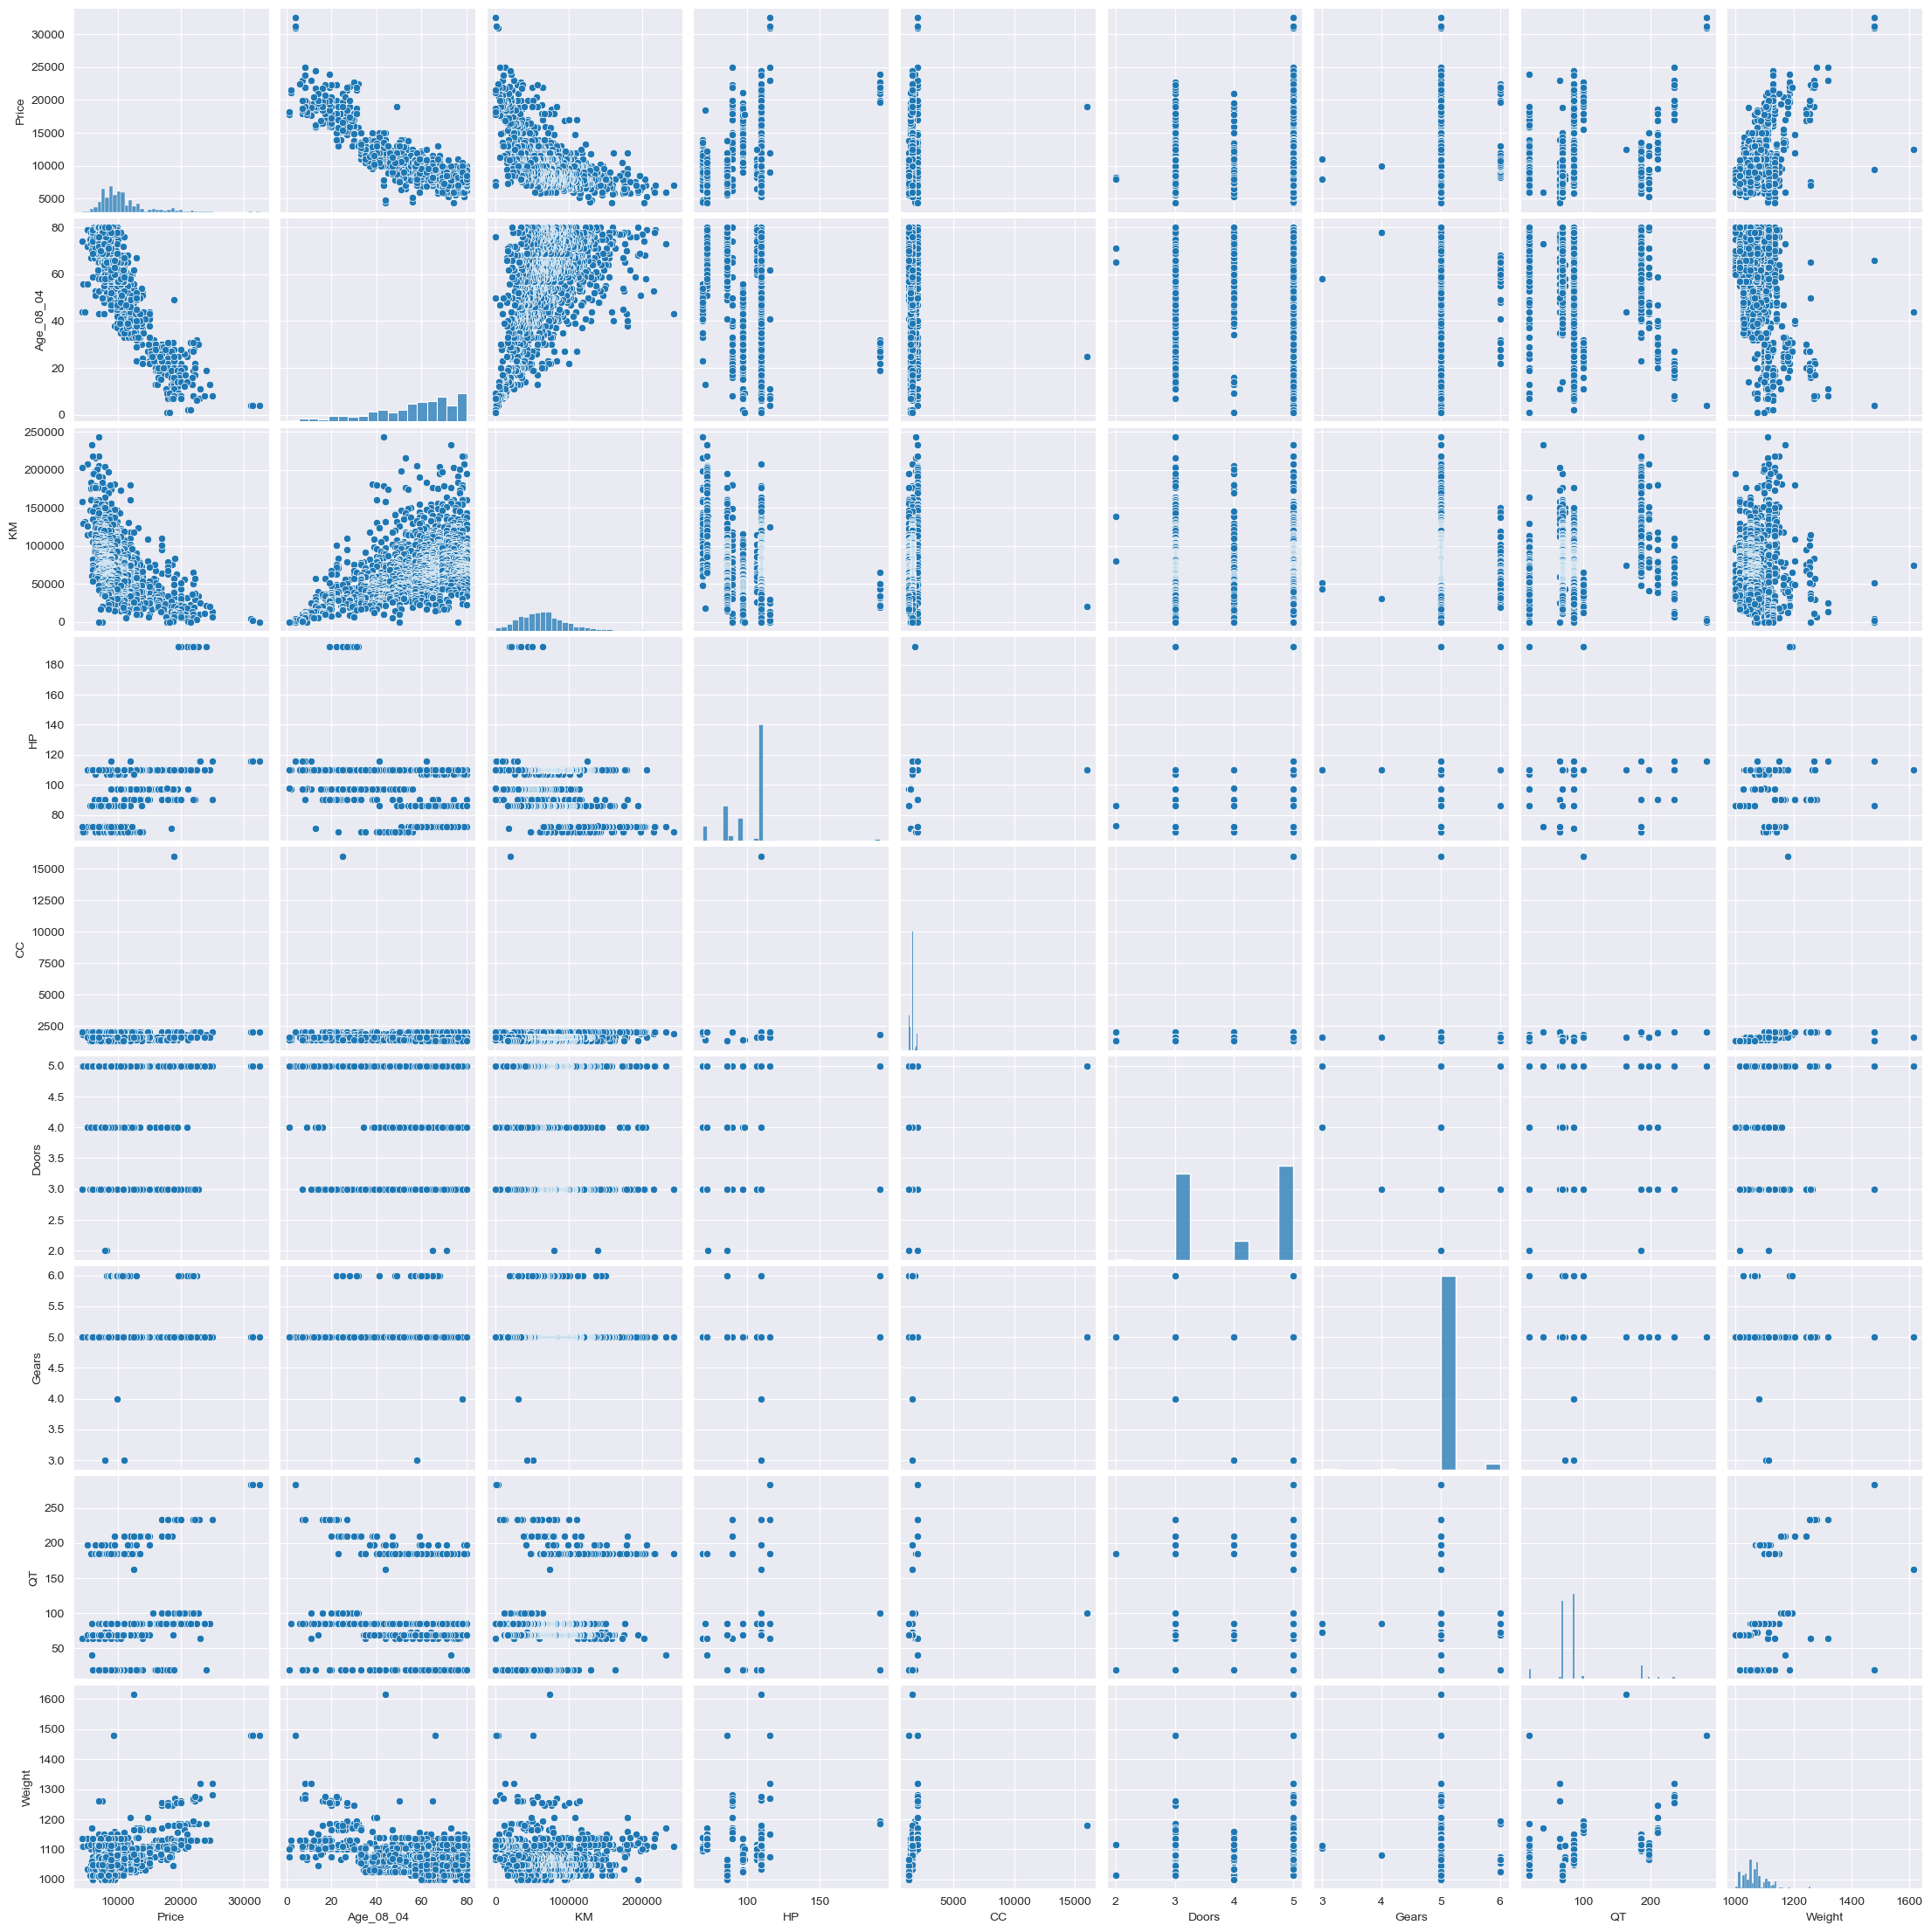

In [12]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(ToyotaCorolla_1)

#### Model Building

In [13]:
import statsmodels.formula.api as smf
model_Build = smf.ols('Price~Age_08_04+KM+HP+CC+Doors+Gears+QT+Weight', data = ToyotaCorolla_1).fit()

#### Model Testing

In [14]:
model_Build.params

Intercept   -5472.540368
Age_08_04    -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [15]:
model_Build.tvalues , np.round(model_Build.pvalues, 7)

(Intercept    -3.875273
 Age_08_04   -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.000111
 Age_08_04    0.000000
 KM           0.000000
 HP           0.000000
 CC           0.188239
 Doors        0.981644
 Gears        0.002452
 QT           0.003290
 Weight       0.000000
 dtype: float64)

In [16]:
model_Build.rsquared , model_Build.rsquared_adj

(0.8625200256947, 0.8617487495415146)

#### Build Simple Linear Regression & Multiple Linear Regression Model

In [17]:
SLr_Price_CC = smf.ols('Price~CC', data = ToyotaCorolla_1).fit()
SLr_Price_CC.tvalues , SLr_Price_CC.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [18]:
SLR_Price_Doors = smf.ols('Price~Doors', data = ToyotaCorolla_1).fit()
SLR_Price_Doors , SLR_Price_Doors.pvalues

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1e57f6f9000>,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [19]:
MLR_Price_CC_Doors = smf.ols('Price~CC+Doors',data = ToyotaCorolla_1).fit()
MLR_Price_CC_Doors.tvalues , MLR_Price_CC_Doors.pvalues 

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

#### Model Validation Techniques 

#### Collinearity Check

VIF = 1/(1-Rsquare)

In [23]:
rsq_AKCDGQW = smf.ols('Age_08_04~KM+HP+CC+Doors+Gears+QT+Weight', data = ToyotaCorolla_1).fit().rsquared
vif_AKCDGQW = 1/(1-rsq_AKCDGQW)

rsq_KAHCDGQW = smf.ols('KM~Age_08_04+HP+CC+Doors+Gears+QT+Weight', data = ToyotaCorolla_1).fit().rsquared
vif_KAHCDGQW = 1/(1-rsq_KAHCDGQW)

rsq_HAKCDGQW = smf.ols('HP~Age_08_04+KM+CC+Doors+Gears+QT+Weight', data = ToyotaCorolla_1).fit().rsquared
vif_HAKCDGQW = 1/(1-rsq_HAKCDGQW)

rsq_CAKHDGQW = smf.ols('CC~Age_08_04+KM+HP+Doors+Gears+QT+Weight', data = ToyotaCorolla_1).fit().rsquared
vif_CAKHDGQW = 1/(1-rsq_CAKHDGQW)

rsq_DAKHCGQW = smf.ols('Doors~Age_08_04+KM+HP+CC+Gears+QT+Weight', data = ToyotaCorolla_1).fit().rsquared
vif_DAKHCGQW = 1/(1-rsq_DAKHCGQW)

rsq_GAKHCDQW = smf.ols('Gears~Age_08_04+KM+HP+CC+Doors+QT+Weight', data = ToyotaCorolla_1).fit().rsquared
vif_GAKHCDQW = 1/(1-rsq_GAKHCDQW)

rsq_QAKHCDGW = smf.ols('QT~Age_08_04+KM+HP+CC+Doors+Gears+Weight', data = ToyotaCorolla_1).fit().rsquared
vif_QAKHCDGW = 1/(1-rsq_QAKHCDGW)

rsq_WAKHCDGQ = smf.ols('Weight~Age_08_04+KM+HP+CC+Doors+Gears+QT', data = ToyotaCorolla_1).fit().rsquared
vif_WAKHCDGQ = 1/(1-rsq_WAKHCDGQ)

In [25]:
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_AKCDGQW, vif_KAHCDGQW, vif_HAKCDGQW, vif_CAKHDGQW, vif_DAKHCGQW, vif_GAKHCDQW, vif_QAKHCDGW, vif_WAKHCDGQ]}
Vif_df = pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


#### Residual Analysis

Test for Normality of Residuals (Q-Q Plot)

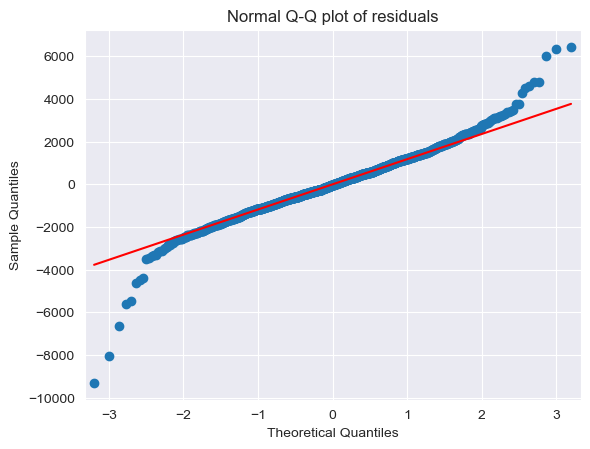

In [29]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
sm.qqplot(model_Build.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

##### outliar detection from above QQ plot of residuals

In [32]:
list(np.where(model_Build.resid>5000)) 

[array([109, 146, 522], dtype=int64)]

In [33]:
list(np.where(model_Build.resid>6000)) 

[array([109, 146, 522], dtype=int64)]

In [38]:
list(np.where(model_Build.resid>7000)) 

[array([], dtype=int64)]

In [35]:
list(np.where(model_Build.resid<-5000))

[array([190, 191, 220, 600, 959], dtype=int64)]

In [37]:
list(np.where(model_Build.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [39]:
list(np.where(model_Build.resid<-7000))

[array([220, 600], dtype=int64)]

#### Test for Homoscedasticity or Heteroscedasticity 

z = (x - mu)/sigma

In [40]:
def standard_values(vals) : return (vals-vals.mean())/vals.std() 

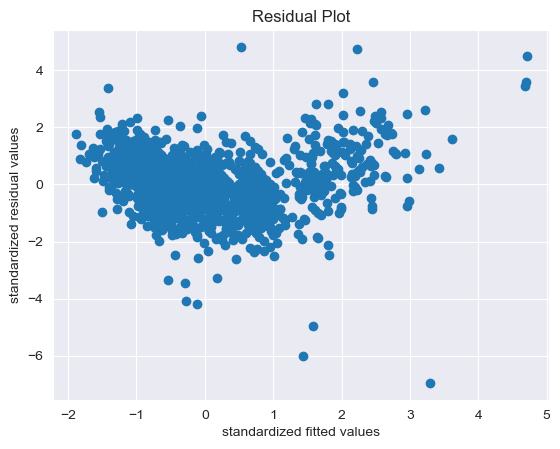

In [43]:
plt.scatter(standard_values(model_Build.fittedvalues),standard_values(model_Build.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

#### Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 

exog = x-variable & endog = y-variable

eval_env: 1


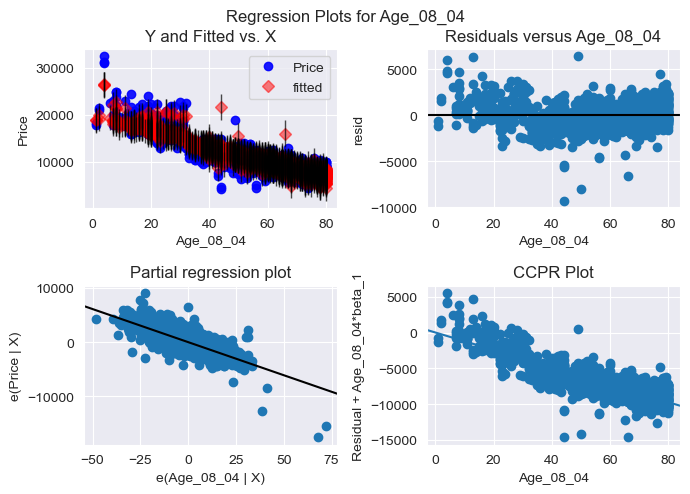

In [47]:
fig = plt.figure(figsize = (7, 5))
sm.graphics.plot_regress_exog(model_Build,'Age_08_04',fig = fig)
plt.show()

eval_env: 1


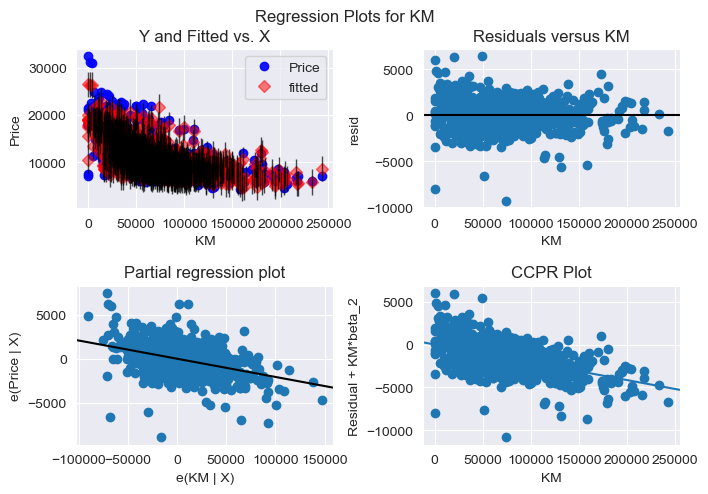

In [50]:
fig = plt.figure(figsize = (7, 5))
sm.graphics.plot_regress_exog(model_Build,'KM', fig = fig)
plt.show()

eval_env: 1


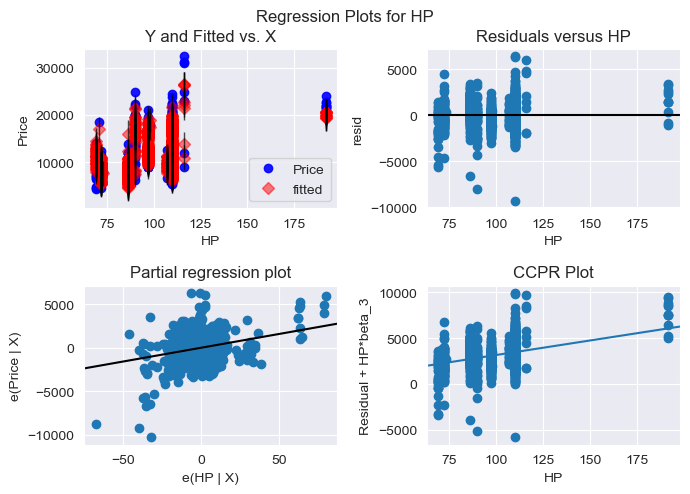

In [51]:
fig = plt.figure(figsize = (7, 5))
sm.graphics.plot_regress_exog(model_Build,'HP',fig = fig)
plt.show()

In [54]:
figc = plt.figure(figsize = (15, 8))
sm.graphics.plot_regress_exog(model_Build,'CC',fig = fig)
plt.show()

eval_env: 1


<Figure size 1500x800 with 0 Axes>

eval_env: 1


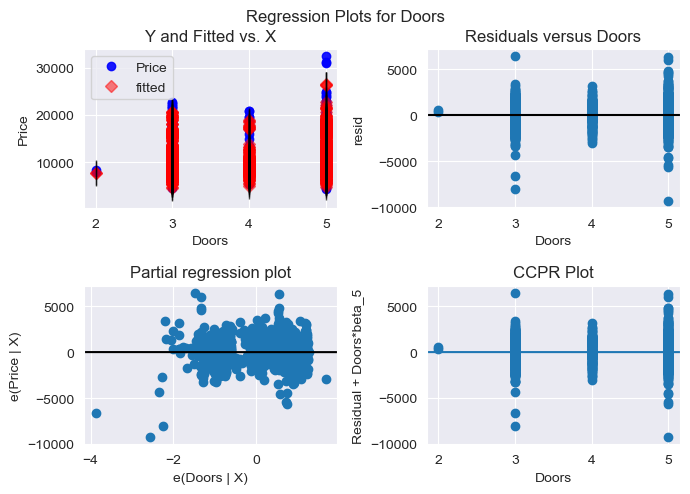

In [55]:
fig = plt.figure(figsize = (7, 5))
sm.graphics.plot_regress_exog(model_Build,'Doors',fig = fig)
plt.show()

eval_env: 1


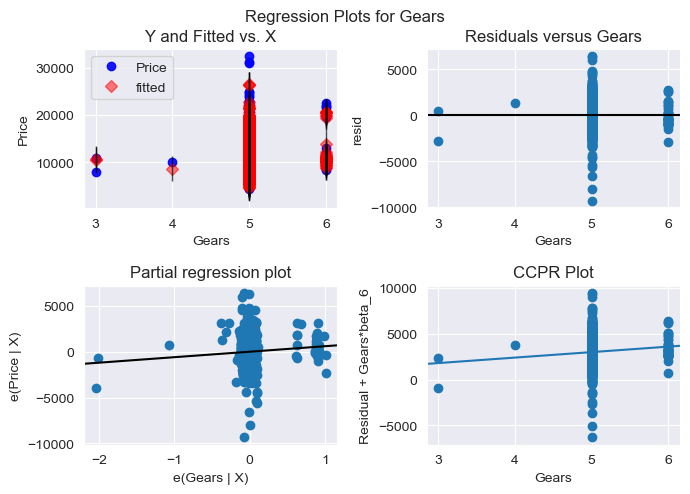

In [56]:
fig = plt.figure(figsize = (7, 5))
sm.graphics.plot_regress_exog(model_Build,'Gears',fig = fig)
plt.show()

eval_env: 1


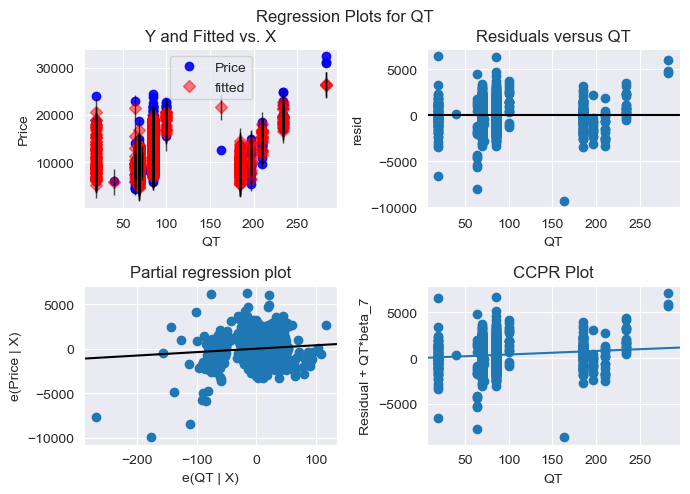

In [57]:
fig = plt.figure(figsize = (7, 5))
sm.graphics.plot_regress_exog(model_Build,'QT',fig = fig)
plt.show()

eval_env: 1


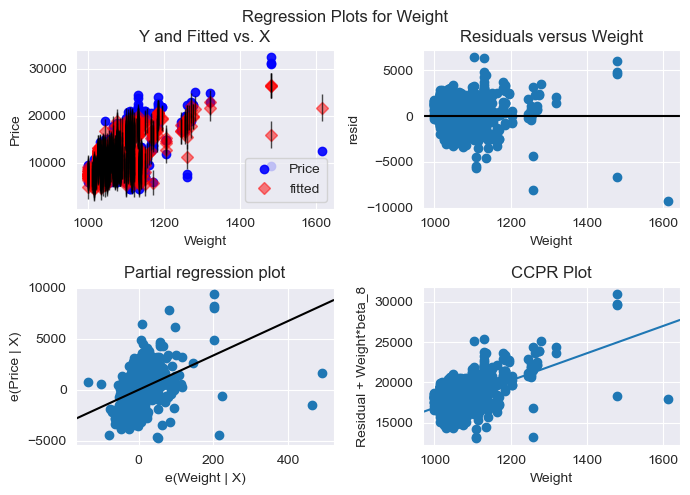

In [58]:
fig = plt.figure(figsize = (7, 5))
sm.graphics.plot_regress_exog(model_Build,'Weight',fig = fig)
plt.show()

#### Cook's Distance

In [60]:
(c,_) = model_Build.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

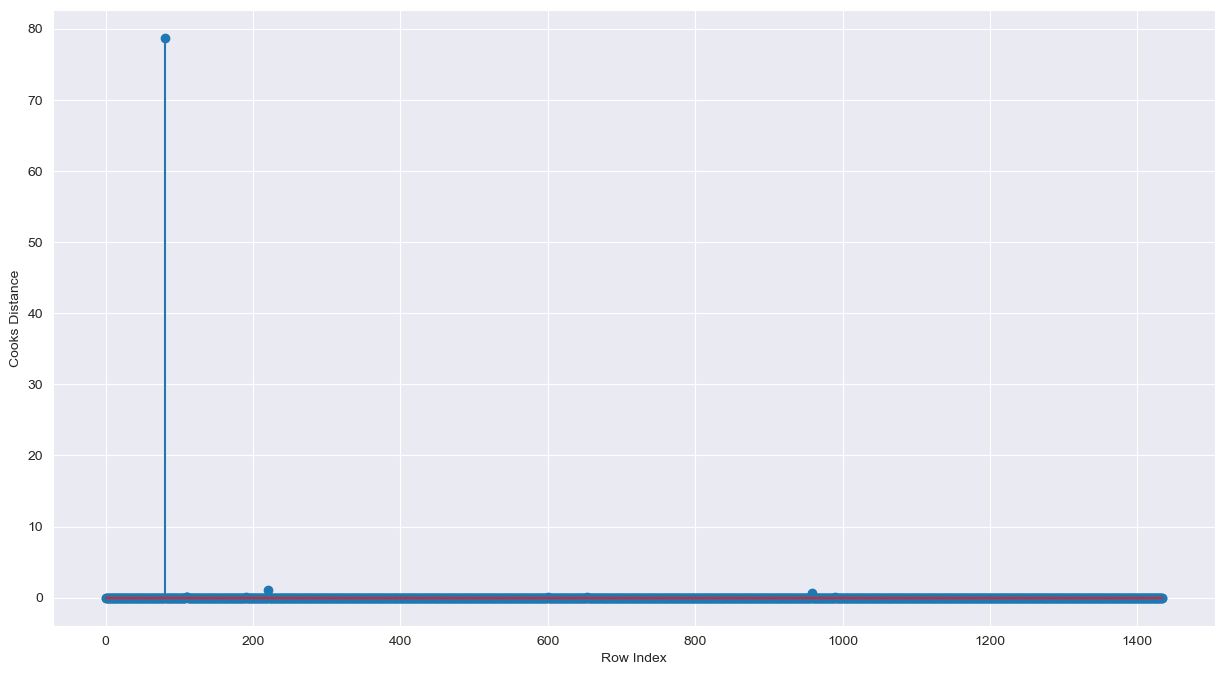

In [62]:
fig = plt.figure(figsize = (15, 8))
plt.stem(np.arange(len(ToyotaCorolla_1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

###### Index and value of influencer where C>0.5

In [63]:
np.argmax(c) , np.max(c)

(80, 78.72950582247552)

#### Leverage Value using High Influence Points 

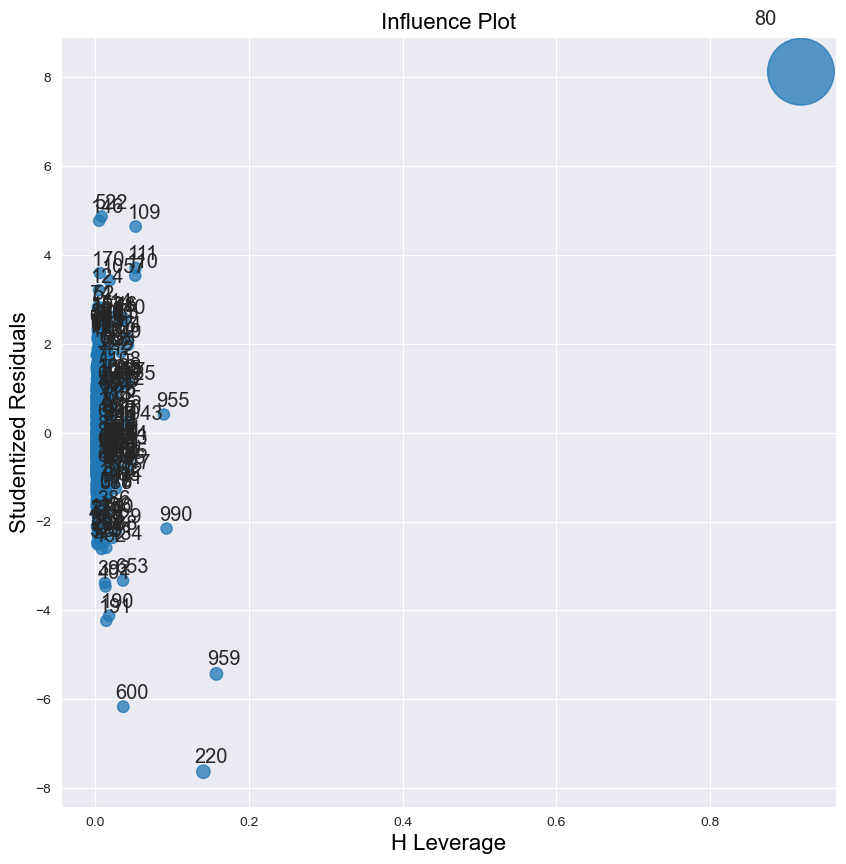

In [67]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize = (10,10))
fig = influence_plot(model_Build, ax = ax)

#### Leverage Cuttoff Value = 3*(k+1)/n  

k = no.of features/columns & n = no. of datapoints 

In [68]:
k = ToyotaCorolla_1.shape[1]
n = ToyotaCorolla_1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [69]:
ToyotaCorolla_1[ToyotaCorolla_1.index.isin([80])] 

,Price,Age_08_04,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


#### MODEL DEVELOPING

In [71]:
ToyotaCorolla_New = ToyotaCorolla_1.copy()
ToyotaCorolla_New

,Price,Age_08_04,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


###### Discard the data points which are influencers and reassign the row number (reset_index(drop=True))

In [72]:
ToyotaCorolla_2 = ToyotaCorolla_New.drop(ToyotaCorolla_New.index[[80]],axis=0).reset_index(drop=True)
ToyotaCorolla_2

,Price,Age_08_04,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


#### Model Deletion Diagnostics and Final Model

In [75]:
while np.max(c)>0.5 :
    model_Build = smf.ols('Price~Age_08_04+KM+HP+CC+Doors+Gears+QT+Weight', data = ToyotaCorolla_2).fit()
    (c,_)= model_Build.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    ToyotaCorolla_2 = ToyotaCorolla_2.drop(ToyotaCorolla_2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    ToyotaCorolla_2
else:
    final_model_Build = smf.ols('Price~Age_08_04+KM+HP+CC+Doors+Gears+QT+Weight',data = ToyotaCorolla_2).fit()
    final_model_Build.rsquared , final_model_Build.aic
    print("Thus model accuracy is improved to",final_model_Build.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [76]:
while np.max(c)<0.5 :
    model_Build = smf.ols('Price~Age_08_04+KM+HP+CC+Doors+Gears+QT+Weight', data = ToyotaCorolla_2).fit()
    (c,_)= model_Build.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    ToyotaCorolla_2 = ToyotaCorolla_2.drop(ToyotaCorolla_2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    ToyotaCorolla_2
else:
    final_model_Build = smf.ols('Price~Age_08_04+KM+HP+CC+Doors+Gears+QT+Weight',data = ToyotaCorolla_2).fit()
    final_model_Build.rsquared , final_model_Build.aic
    print("Thus model accuracy is improved to",final_model_Build.rsquared)

Thus model accuracy is improved to 0.9998182813809136


In [77]:
final_model_Build.rsquared

0.9998182813809136

In [78]:
ToyotaCorolla_2

,Price,Age_08_04,KM,HP,CC,Doors,Gears,QT,Weight
0,13250,32,45725,110,1600,5,5,85,1075
1,11495,44,96829,110,1600,5,5,85,1075
2,10950,41,75697,97,1400,3,5,69,1025
3,11950,35,65988,110,1600,3,5,69,1040
4,12495,39,50873,110,1600,5,5,85,1075
...,...,...,...,...,...,...,...,...,...
65,6750,80,66168,86,1300,3,5,69,1015
66,7500,74,58454,86,1300,3,5,69,1015
67,8950,70,44850,110,1600,3,5,69,1050
68,7750,73,39168,86,1300,3,5,69,1015


#### Model Predictions

In [79]:
new_data = pd.DataFrame({'Age_08_04':12,"KM":60000,"HP":80,"CC":1700,"Doors":4,"Gears":5,"QT":69,"Weight":1112},index=[0])
new_data

,Age_08_04,KM,HP,CC,Doors,Gears,QT,Weight
0,12,60000,80,1700,4,5,69,1112


In [80]:
final_model_Build.predict(new_data)

0    18774.331348
dtype: float64

In [82]:
pred_y = final_model_Build.predict(ToyotaCorolla_2)
pred_y

0     13247.075321
1     11474.046506
2     10944.662918
3     11944.574860
4     12453.962112
          ...     
65     6766.346154
66     7478.439119
67     8945.034372
68     7773.130031
69     8472.219924
Length: 70, dtype: float64

### Conclusion

Overall, this implemetations is a comprehensive example of data preprocessing, model building, and model evaluation in the context of multiple linear regression for predicting car prices. The final model aims to provide accurate predictions while addressing issues such as multicollinearity and influential data points. However, the code does not include comments or explanations for each step, making it challenging to understand without prior knowledge of linear regression and data analysis.